# Задача

С помощью имеющего набора данных о транзакциях в сети блокчейн Ethereum составить граф и провести его анализ.

# Датасет

## Описание

Датасет содержит таблицу с транзациями в сети блокчейн Ethereum.

Описание файлов:

* Dataset.csv - транзакции
* fakeAddresses_unique.txt - адреса

Описание полей:

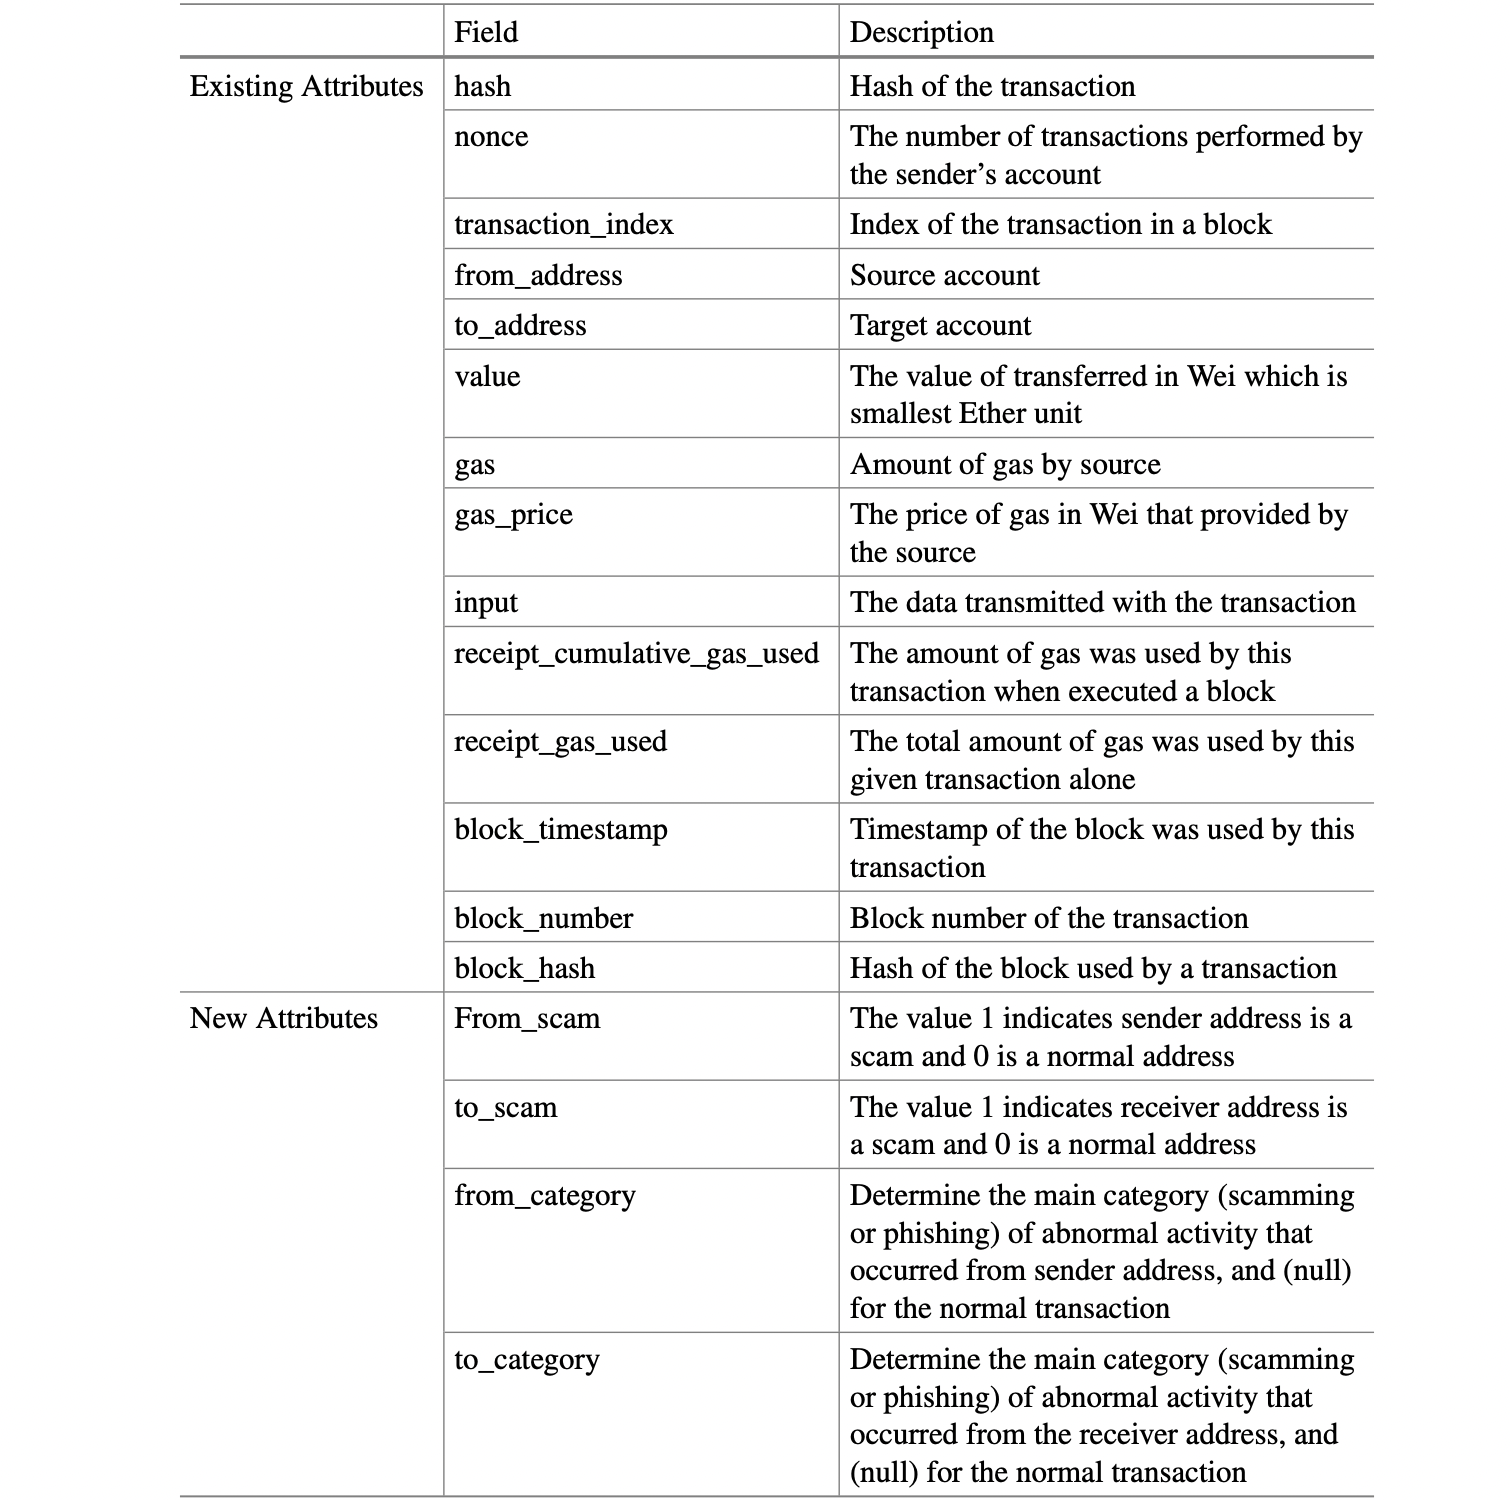

Источник:

https://www.researchgate.net/profile/Salam-Al-Emari/publication/349036616_A_Labeled_Transactions-Based_Dataset_on_the_Ethereum_Network/links/60ed51bd16f9f313007c75d2/A-Labeled-Transactions-Based-Dataset-on-the-Ethereum-Network.pdf?origin=publication_detail

## Загрузка

Клонируем репозиторий с датасетом

In [ ]:
!git clone https://github.com/salam-ammari/Labeled-Transactions-based-Dataset-of-Ethereum-Network.git

Cloning into 'Labeled-Transactions-based-Dataset-of-Ethereum-Network'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 44 (delta 22), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


Разархивируем архив с датасетом из репозитория

In [ ]:
!unzip '/content/Labeled-Transactions-based-Dataset-of-Ethereum-Network/Dataset.zip' -d '/content'

Archive:  /content/Labeled-Transactions-based-Dataset-of-Ethereum-Network/Dataset.zip
   creating: /content/Dataset/
  inflating: /content/Dataset/Dataset.csv  
  inflating: /content/Dataset/fakeAddresses_unique.txt  


Загружаем датасет в pandas dataframe

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None # отключаем лишние предупреждения

df_ = pd.read_csv('/content/Dataset/Dataset.csv')

## Препроцессинг

Ознакомимся с размером и частью датасета

In [ ]:
df = df_.copy(deep=True) # копируем изначальный датасет, чтобы не портить источник
print('Размерность таблицы датасета:', df.shape)
df.head()

Размерность таблицы датасета: (71250, 18)


,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN


Для анализа и построения графа транзакций я выбрал следующие поля:

In [ ]:
df = df_[['nonce', 'transaction_index', 'from_address', 'to_address', 'value', 
         'gas', 'gas_price', 'receipt_cumulative_gas_used', 'receipt_gas_used']]
df['scam'] = df_['from_scam'] + df_['to_scam']
df.head()

,nonce,transaction_index,from_address,to_address,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,scam
0,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,129358,21000,0
1,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,5415387,21000,0
2,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,1369625,21000,0
3,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,2464655,21000,0
4,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,2569655,21000,0


Конвертируем денежные единицы перевода из Wei в Ethereum

In [ ]:
df['value'] = df['value'] / 1000000000000000000
df['gas_price'] = df['gas_price'] / 1000000000000000000
df.head()

,nonce,transaction_index,from_address,to_address,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,scam
0,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.8000,30000,2.205000e-08,129358,21000,0
1,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,0.0075,90000,2.060947e-08,5415387,21000,0
2,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,0.0075,90000,2.060947e-08,1369625,21000,0
3,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,0.0075,90000,2.060947e-08,2464655,21000,0
4,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,0.0075,90000,2.060947e-08,2569655,21000,0


Закодируем адреса транзакций с помощью label encoder, то есть присвоем сокращенные id. Скэйлинг не потребуется, так как используем RandomForest.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import random
random.seed(1)


full_address = df['from_address'].tolist() + df['to_address'].tolist()
address_label_encoder = LabelEncoder()
address_label_encoder.fit(full_address)

df['from_address'] = address_label_encoder.transform(df['from_address'])
df['to_address'] = address_label_encoder.transform(df['to_address'])
df.head()

,nonce,transaction_index,from_address,to_address,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,scam
0,370394,4,11158,61464,1.8000,30000,2.205000e-08,129358,21000,0
1,229082,85,13989,52970,0.0075,90000,2.060947e-08,5415387,21000,0
2,229095,31,13989,27114,0.0075,90000,2.060947e-08,1369625,21000,0
3,229126,78,13989,63713,0.0075,90000,2.060947e-08,2464655,21000,0
4,229131,83,13989,48759,0.0075,90000,2.060947e-08,2569655,21000,0


# Анализ

## Признаки

Создадим граф networkx из pandas dataframe

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(df, 'from_address', 'to_address', 
                            edge_attr=True, create_using=nx.DiGraph())

Добавим признаки, которые обычно используется в задачах LPP. Это простые признаки (степень вершины, коэффициент кластеризации и т.п.) и/или специальные:

* Длина кратчайшего пути между вершинами (ясно, что чем он меньше, тем скорее они соединятся ребром).
* Число общих друзей (= число путей длины 2 между вершинами, также ясно, что чем он больше, тем скорее вершины соединятся).
* Коэффициент Жаккара (отношение числа общих друзей двух вершин к числу всех друзей двух вершин — нормированный вариант предыдущего признака).
* Коэффициент Адамик/Адара — весовая сумма общих друзей, каждый общий друг берётся с весом «1/log(число его друзей)», т.е. дружба с теми, кто дружит не со всеми подряд, более ценная.
* Аналогично и число путей между вершинами можно вычислять по весовой схеме. Наиболее популярная — Katz.
* Признаки, основанные на случайных блужданиях. Устраивают случайные блуждания из одной вершины, вычисляют различные характеристики, связанные с попаданием во вторую (например, среднее число попаданий, при ограниченном времени блуждания).
* Рекурсивные признаки. Вершины близки (а все признаки здесь так или иначе формализуют понятие «близость») тогда и только тогда, когда близки их друзья. Поэтому можно пересчитывать близость вершин, основываясь на близости соседних.

Это классика, но есть масса других подходов, например, основанных на матричной факторизации (матрицы смежности графа или её подматриц).

Воспользуемся теми признаками, которые уместны в нашем датасете, для бинарной классификации

Длина кратчайшего пути между вершинами

In [ ]:
def compute_shortest_path_length(a, b):
    try:
        return nx.shortest_path_length(G, source=a, target=b)
    except:
        return -1

Центральность Каца

Подробнее:
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html

In [ ]:
from networkx.algorithms.centrality import katz_centrality

k = katz_centrality(G, alpha=0.005, beta=1)
mean_k = sum(k.values())/len(k)

Концентраторы и авторитеты HITS

Подробнее: 
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.hits_alg.hits.html

In [ ]:
from networkx.algorithms.link_analysis.hits_alg import hits

h = hits(G, max_iter=100, tol=1e-08, nstart=None, normalized=True)

Добавляем вычесленные признаки к датасету

In [ ]:
df_pl = df.copy(deep=True) # копируем изначальный датасет, чтобы не портить источник
df_pl.drop(['value'], axis=1, inplace=True)
df_pl.head()

,nonce,transaction_index,from_address,to_address,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,scam
0,370394,4,11158,61464,30000,2.205000e-08,129358,21000,0
1,229082,85,13989,52970,90000,2.060947e-08,5415387,21000,0
2,229095,31,13989,27114,90000,2.060947e-08,1369625,21000,0
3,229126,78,13989,63713,90000,2.060947e-08,2464655,21000,0
4,229131,83,13989,48759,90000,2.060947e-08,2569655,21000,0


In [ ]:
df_pl['katz_from'] = df_pl['from_address'].apply(lambda x: k.get(x, mean_k))
df_pl['katz_to'] = df_pl['to_address'].apply(lambda x: k.get(x, mean_k))
df_pl['hubs_from'] = df_pl['from_address'].apply(lambda x: h[0].get(x, 0)) # Концентраторы оценивают значение узла на основе исходящих каналов
df_pl['hubs_to'] = df_pl['to_address'].apply(lambda x: h[0].get(x, 0))
df_pl['authorities_from'] = df_pl['from_address'].apply(lambda x: h[1].get(x, 0)) # Авторитеты оценивают значение узла на основе входящих каналов
df_pl['authorities_to'] = df_pl['to_address'].apply(lambda x: h[1].get(x, 0))
df_pl.head()

,nonce,transaction_index,from_address,to_address,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,scam,katz_from,katz_to,hubs_from,hubs_to,authorities_from,authorities_to
0,370394,4,11158,61464,30000,2.205000e-08,129358,21000,0,0.003693,0.003693,4.451343e-16,0.0,-6.889141e-21,5.098128e-16
1,229082,85,13989,52970,90000,2.060947e-08,5415387,21000,0,0.007147,0.003711,2.311769e-19,0.0,-5.253485e-18,-1.704210e-18
2,229095,31,13989,27114,90000,2.060947e-08,1369625,21000,0,0.007147,0.003711,2.311769e-19,0.0,-5.253485e-18,-1.704210e-18
3,229126,78,13989,63713,90000,2.060947e-08,2464655,21000,0,0.007147,0.003711,2.311769e-19,0.0,-5.253485e-18,-1.704210e-18
4,229131,83,13989,48759,90000,2.060947e-08,2569655,21000,0,0.007147,0.003711,2.311769e-19,0.0,-5.253485e-18,-1.704210e-18


Разделяем датасет для обучения и тестирования

In [ ]:
from sklearn.model_selection import train_test_split

df_pl_train, df_pl_test = train_test_split(df_pl, test_size=0.2)
df_pl_train.shape, df_pl_test.shape

((57000, 15), (14250, 15))

In [ ]:
y_train = df_pl_train.pop('scam')
y_test = df_pl_test.pop('scam')

## Обучение

Подробнее: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Подробнее: 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

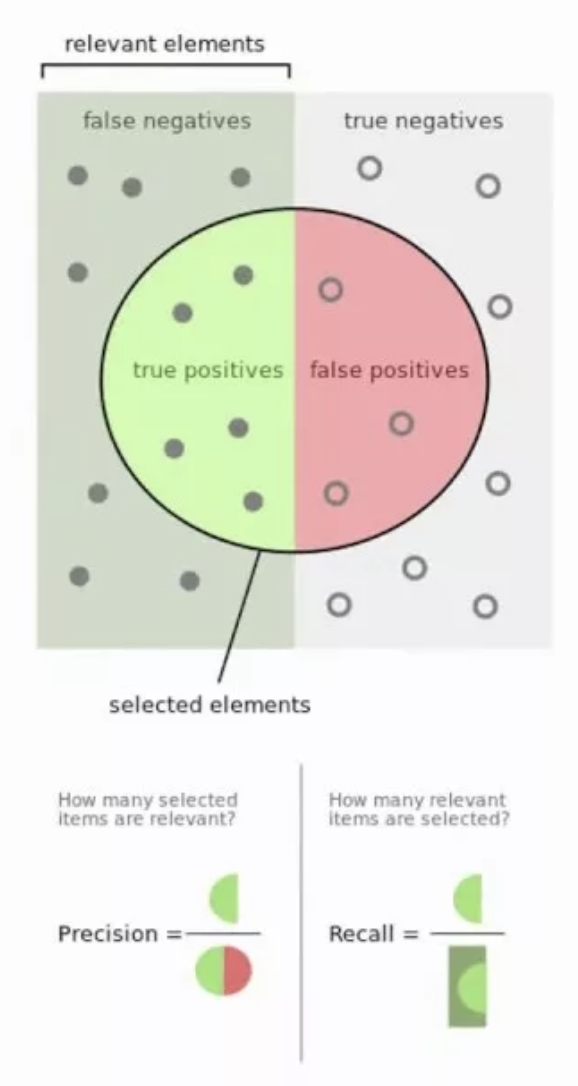

Estimators = 25 | Train F1-score 0.9479610713224877 | Test F1-score 0.9492853625693344
Estimators = 50 | Train F1-score 0.9478432385785964 | Test F1-score 0.9495096852360919
Estimators = 100 | Train F1-score 0.9459766319560308 | Test F1-score 0.947584539872017
Estimators = 150 | Train F1-score 0.9457112118589738 | Test F1-score 0.9476537369275259
Estimators = 200 | Train F1-score 0.9457015786290698 | Test F1-score 0.9475758839411905


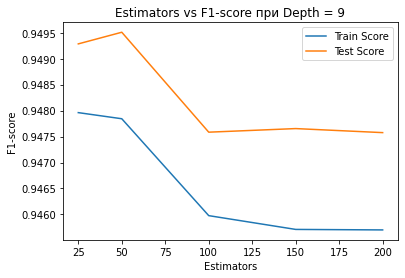

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


estimators = [25,50,100,150,200] # кол-во веток
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=9, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_samples_leaf=52, min_samples_split=120,
        min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,
        random_state=25, verbose=0, warm_start=False)
    clf.fit(df_pl_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_pl_train), average='weighted')
    test_sc = f1_score(y_test, clf.predict(df_pl_test), average='weighted')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators =', i, '| Train F1-score', train_sc, '| Test F1-score', test_sc)
plt.plot(estimators, train_scores, label='Train Score')
plt.plot(estimators, test_scores, label='Test Score')
plt.title('Estimators vs F1-score при Depth = 9')
plt.xlabel('Estimators')
plt.ylabel('F1-score')
plt.legend()
plt.show()
# оптимизация гипер параметров (ищем наиболее лучшие гиперпараметры)

Depth = 9 | Train F1-score 0.9459766319560308 | Test F1-score 0.947584539872017
Depth = 12 | Train F1-score 0.951767992411068 | Test F1-score 0.9530066878894381
Depth = 24 | Train F1-score 0.9677085334374116 | Test F1-score 0.9671116956137312
Depth = 48 | Train F1-score 0.9677459175250486 | Test F1-score 0.9671116956137312
Depth = 96 | Train F1-score 0.9677459175250486 | Test F1-score 0.9671116956137312


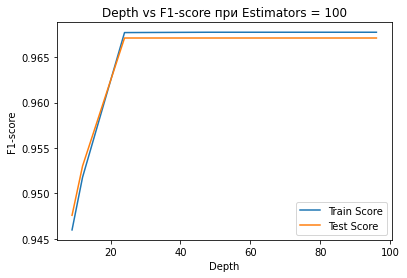

In [ ]:
depths = [9,12,24,48,96] # макс глубина веток
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            random_state=25, verbose=0, warm_start=False)
    clf.fit(df_pl_train, y_train)
    train_sc = f1_score(y_train, clf.predict(df_pl_train), average='weighted')
    test_sc = f1_score(y_test, clf.predict(df_pl_test), average='weighted')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth =', i, '| Train F1-score', train_sc, '| Test F1-score', test_sc)
plt.plot(depths, train_scores, label='Train Score')
plt.plot(depths, test_scores, label='Test Score')
plt.title('Depth vs F1-score при Estimators = 100')
plt.xlabel('Depth')
plt.ylabel('F1-score')
plt.legend()
plt.show()

В результате мы получили визуализацию зависимости F1-score от гиперпараметров RandomForestClassifier и достойную по точности (Test F1-score 0.9) модель бинарной классификации